# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

---
## Desarrollo del modelo de K-Nearest Neighbors (KNN)
---

#### Carga de datos

In [25]:
import pandas as pd

In [26]:
# Cargar datasets
X_train = pd.read_csv("output/burnout_X_train.csv")
y_train = pd.read_csv("output/burnout_y_train.csv")
X_test = pd.read_csv("output/burnout_X_test.csv")
y_test = pd.read_csv("output/burnout_y_test.csv")

X_train_pca = pd.read_csv("output/burnout_X_train_PCA.csv")
X_test_pca = pd.read_csv("output/burnout_X_test_PCA.csv")

**Importancia de la estandarización en KNN y su relación con PCA**

El modelo K-Nearest Neighbors (KNN) es muy sensible a las escalas de las variables, ya que se basa en medidas de distancia (como la euclídea). Por eso, es fundamental estandarizar las variables antes de aplicar este modelo. En este caso, **los datos originales (`burnout_X_train.csv` y `burnout_X_test.csv`) ya fueron estandarizados previamente utilizando `StandardScaler`** antes de realizar cualquier modelado o reducción de dimensionalidad.

Al aplicar PCA, es buena práctica hacerlo también sobre un dataset previamente estandarizado, dado que PCA también es sensible a la escala de las variables. Por lo tanto, **los datasets `X_train_PCA` y `X_test_PCA` ya son el resultado de aplicar PCA sobre datos previamente estandarizados**.

Por esta razón, **no es necesario volver a aplicar `StandardScaler` sobre los datasets PCA**, ya que eso implicaría reescalar componentes que ya fueron generados a partir de un espacio ortogonal y escalado. Hacerlo podría distorsionar la proporción de varianzas explicadas y afectar negativamente el rendimiento del modelo.

### KNN sin y con PCA

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# KNN con datos originales
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train.values.ravel())
y_pred_original = knn_original.predict(X_test)

# KNN con datos PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train.values.ravel())
y_pred_pca = knn_pca.predict(X_test_pca)

# Reportes
report_original = classification_report(y_test, y_pred_original)
report_pca = classification_report(y_test, y_pred_pca)

print("Reporte con datos originales:\n", report_original)
print("\nReporte con datos PCA:\n", report_pca)

Reporte con datos originales:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1136
         1.0       0.84      0.89      0.86      2514
         2.0       0.79      0.63      0.70       637

    accuracy                           0.84      4287
   macro avg       0.82      0.78      0.80      4287
weighted avg       0.83      0.84      0.83      4287


Reporte con datos PCA:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1136
         1.0       0.84      0.88      0.86      2514
         2.0       0.75      0.62      0.68       637

    accuracy                           0.83      4287
   macro avg       0.81      0.78      0.79      4287
weighted avg       0.83      0.83      0.83      4287



In [28]:
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [29]:
from sklearn.metrics import f1_score

f1_original = f1_score(y_test, y_pred_original, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

In [30]:
from IPython.display import display, Markdown

# Mostrar encabezado con texto enriquecido
display(Markdown("Resultados del modelo **KNN** ( `k=5` ) en ambos escenarios:"))

# Crear tabla de comparación
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-score"],
    "Datos Originales": [f"{accuracy_original:.4f}", f"{f1_original:.4f}"],
    "Datos con PCA": [f"{accuracy_pca:.4f}", f"{f1_pca:.4f}"]
})

# Mostrar tabla
display(resultados)

Resultados del modelo **KNN** ( `k=5` ) en ambos escenarios:

,Métrica,Datos Originales,Datos con PCA
0,Accuracy,0.8353,0.8286
1,F1-score,0.8328,0.8264


#### Conclusión

El modelo KNN muestra un desempeño ligeramente superior cuando se entrena con los datos originales en comparación con los datos transformados por PCA. Aun así, PCA puede ser útil para reducir la dimensionalidad y el costo computacional en modelos más complejos.

### Accuracy del Modelo KNN según K

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

k_values = list(range(1, 21))
accuracies_original = []
f1_scores_original = []
accuracies_pca_corrected = []
f1_scores_pca_corrected = []

for k in k_values:
    # Datos originales
    knn_orig = KNeighborsClassifier(n_neighbors=k)
    knn_orig.fit(X_train, y_train.values.ravel())
    y_pred_orig = knn_orig.predict(X_test)
    accuracies_original.append(accuracy_score(y_test, y_pred_orig))
    f1_scores_original.append(f1_score(y_test, y_pred_orig, average="weighted"))

    # Datos PCA sin reescalar
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_train_pca, y_train.values.ravel())
    y_pred_pca = knn_pca.predict(X_test_pca)
    accuracies_pca_corrected.append(accuracy_score(y_test, y_pred_pca))
    f1_scores_pca_corrected.append(f1_score(y_test, y_pred_pca, average="weighted"))


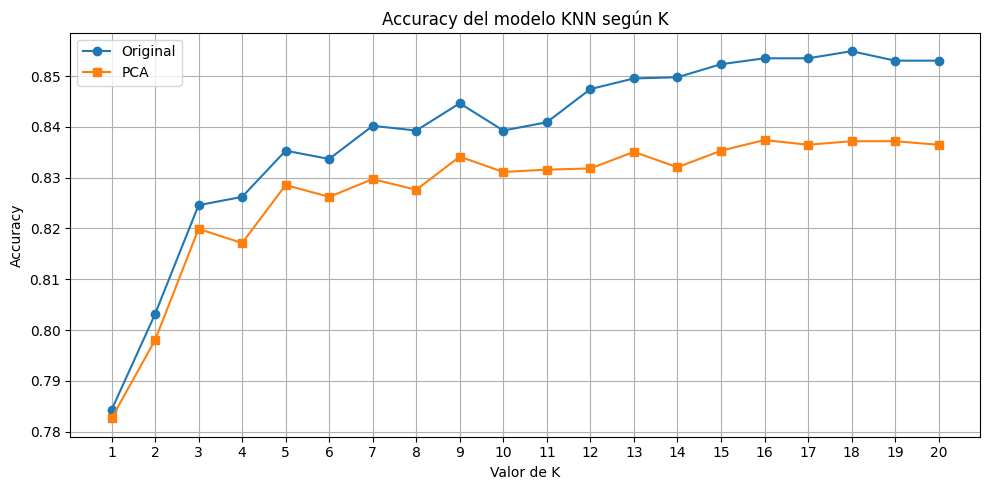

In [32]:
# Accuracy vs K
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies_original, marker='o', label="Original")
plt.plot(k_values, accuracies_pca_corrected, marker='s', label="PCA")
plt.xticks(k_values)
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")
plt.title("Accuracy del modelo KNN según K")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La precisión del modelo varía con el valor de \( k \). El rendimiento tiende a estabilizarse a partir de valores moderados de \( k \) y el modelo con datos originales presenta una leve ventaja sobre los datos transformados con PCA.

### F1-score del Modelo KNN según K

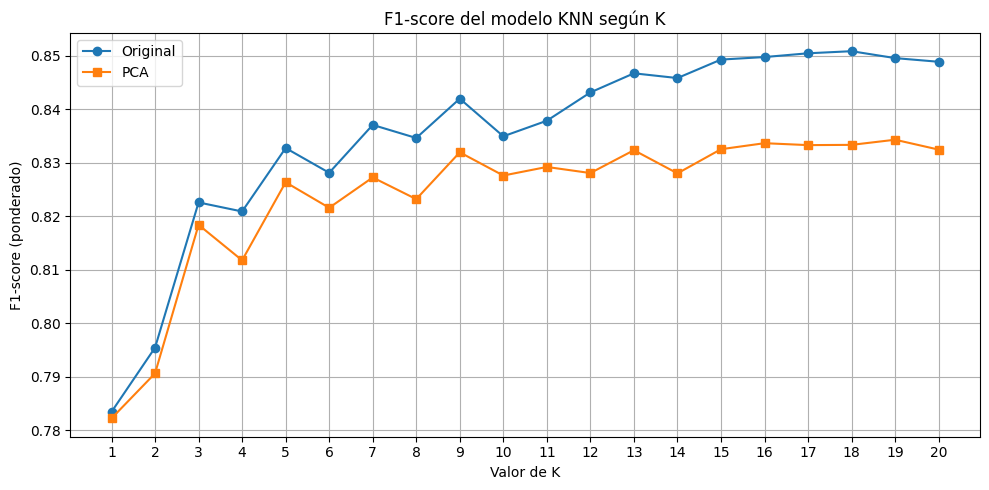

In [33]:
# F1-score vs K
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), f1_scores_original, marker='o', label="Original")
plt.plot(range(1, 21), f1_scores_pca_corrected, marker='s', label="PCA")
plt.xticks(k_values)
plt.xlabel("Valor de K")
plt.ylabel("F1-score (ponderado)")
plt.title("F1-score del modelo KNN según K")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El F1-score ponderado muestra un patrón similar al de la accuracy. La versión con datos originales tiene una ligera superioridad, especialmente en los valores bajos de \( k \).

#### Conclusión

- El modelo KNN mostró **mejor desempeño en accuracy y F1-score con los datos originales** que con los datos reducidos por PCA.
- La aplicación de PCA simplificó el espacio de características, pero a costa de una leve pérdida de precisión.
- **No es necesario estandarizar nuevamente los datos resultantes del PCA**, ya que estos componentes ya derivan de variables previamente escaladas.

Usar PCA puede ser útil cuando se busca reducir dimensionalidad para modelos más complejos o cuando se enfrenta alta multicolinealidad, pero en KNN, si el tiempo de cómputo no es un problema, conviene mantener las variables originales estandarizadas.

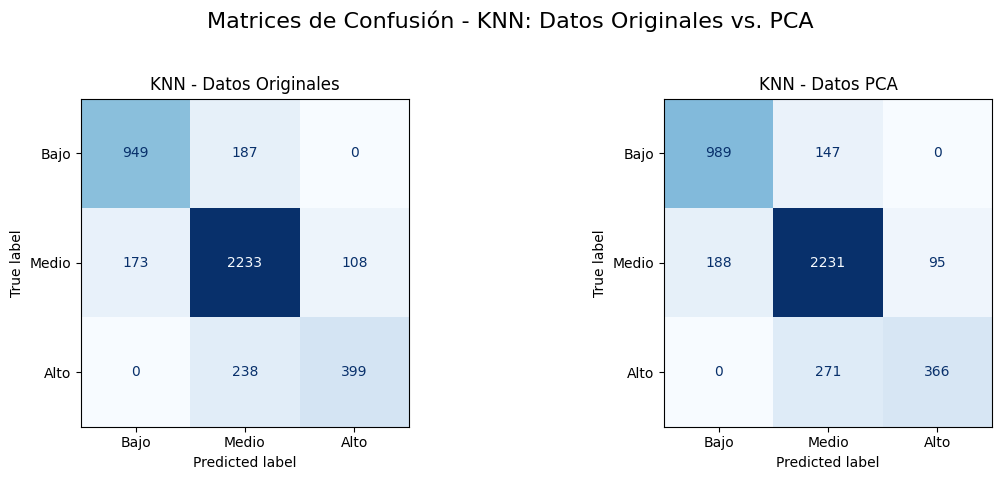

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Calcular matrices de confusión
cm_knn_regular = confusion_matrix(y_test, y_pred_original)
cm_knn_pca = confusion_matrix(y_test, y_pred_pca)

# Clases
class_mapping = {0.0: 'Bajo', 1.0: 'Medio', 2.0: 'Alto'}
classes_present = np.unique(y_test)
labels = [class_mapping[c] for c in classes_present]

# Gráfico lado a lado
fig_cm, axes_cm = plt.subplots(1, 2, figsize=(12, 5))
fig_cm.suptitle('Matrices de Confusión - KNN: Datos Originales vs. PCA', fontsize=16)

disp_regular = ConfusionMatrixDisplay(confusion_matrix=cm_knn_regular, display_labels=labels)
disp_regular.plot(ax=axes_cm[0], cmap=plt.cm.Blues, colorbar=False)
axes_cm[0].set_title('KNN - Datos Originales')
axes_cm[0].grid(False)

disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_knn_pca, display_labels=labels)
disp_pca.plot(ax=axes_cm[1], cmap=plt.cm.Blues, colorbar=False)
axes_cm[1].set_title('KNN - Datos PCA')
axes_cm[1].grid(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Conclusión - Matrices de Confusión

La comparación de las matrices de confusión entre el modelo KNN entrenado con **datos originales** y con **datos transformados por PCA** permite observar diferencias importantes:

- En ambos casos, la clase **Bajo** es la mejor clasificada, con una alta cantidad de verdaderos positivos.
- La clase **Medio** presenta más errores de clasificación, especialmente con los datos PCA, donde se observa una mayor confusión con la clase **Alto**.
- El modelo entrenado con **datos originales estandarizados** muestra una **mejor precisión global**, con menor cantidad de errores fuera de la diagonal principal.

**Conclusión**: 

Aunque PCA mantiene la estructura general de clasificación, el uso de los datos originales brinda mejores resultados en cuanto a predicciones correctas por clase, lo que reafirma la recomendación de utilizar los datos estandarizados completos para este modelo.

### Curvas ROC - Comparación multiclase (One-vs-Rest)

Se evaluó la performance del modelo KNN (`k=5`) para cada clase mediante curvas ROC con un enfoque *one-vs-rest* (OvR).

Para hacer esto:
1. Se binarizaron las clases con label_binarize() → esto transforma un problema multiclase en varios problemas binarios (uno por clase).

2. Para cada clase i, se calculó:
- La tasa de verdaderos positivos (TPR) y falsos positivos (FPR) donde:
    - La clase i es considerada la positiva.
    - Las demás clases son consideradas negativas.

3. Se trazó una curva ROC para cada clase individualmente.

A continuación, se presentan los gráficos por separado para los modelos entrenados con datos originales y con datos reducidos por PCA.

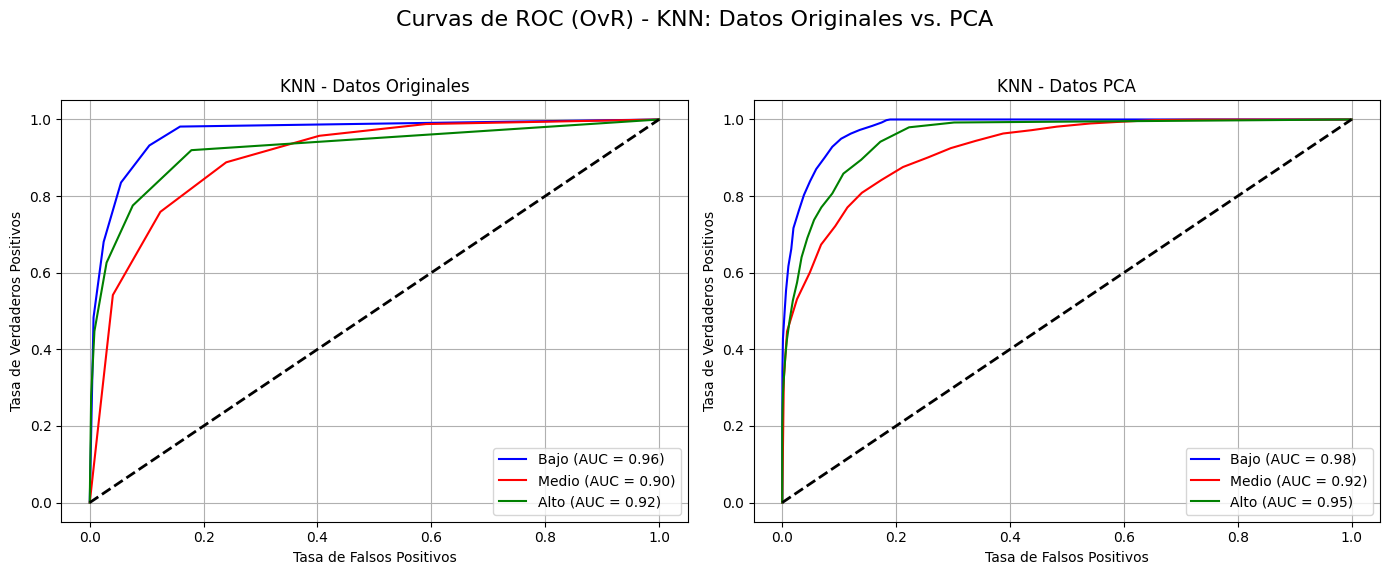

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarizar etiquetas
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# Obtener predicciones probabilísticas
y_score_original = knn_original.predict_proba(X_test)
y_score_pca = knn_pca.predict_proba(X_test_pca)

# Calcular FPR, TPR y AUC para cada clase
fpr_original, tpr_original, roc_auc_original = dict(), dict(), dict()
fpr_pca, tpr_pca, roc_auc_pca = dict(), dict(), dict()

for i, label in enumerate(classes):
    fpr_original[i], tpr_original[i], _ = roc_curve(y_test_bin[:, i], y_score_original[:, i])
    roc_auc_original[i] = auc(fpr_original[i], tpr_original[i])

    fpr_pca[i], tpr_pca[i], _ = roc_curve(y_test_bin[:, i], y_score_pca[:, i])
    roc_auc_pca[i] = auc(fpr_pca[i], tpr_pca[i])

# Colores y etiquetas
colors = ['blue', 'red', 'green']
class_mapping = {0.0: 'Bajo', 1.0: 'Medio', 2.0: 'Alto'}

# Crear figura lado a lado
fig_roc, axes_roc = plt.subplots(1, 2, figsize=(14, 6))
fig_roc.suptitle('Curvas de ROC (OvR) - KNN: Datos Originales vs. PCA', fontsize=16)

# ROC - Datos Originales
for j, color in zip(range(len(classes)), colors):
    axes_roc[0].plot(fpr_original[j], tpr_original[j], color=color,
                     label=f'{class_mapping[classes[j]]} (AUC = {roc_auc_original[j]:.2f})')
axes_roc[0].plot([0, 1], [0, 1], 'k--', lw=2)
axes_roc[0].set_xlabel('Tasa de Falsos Positivos')
axes_roc[0].set_ylabel('Tasa de Verdaderos Positivos')
axes_roc[0].set_title('KNN - Datos Originales')
axes_roc[0].legend(loc='lower right')
axes_roc[0].grid(True)

# ROC - Datos PCA
for j, color in zip(range(len(classes)), colors):
    axes_roc[1].plot(fpr_pca[j], tpr_pca[j], color=color,
                     label=f'{class_mapping[classes[j]]} (AUC = {roc_auc_pca[j]:.2f})')
axes_roc[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes_roc[1].set_xlabel('Tasa de Falsos Positivos')
axes_roc[1].set_ylabel('Tasa de Verdaderos Positivos')
axes_roc[1].set_title('KNN - Datos PCA')
axes_roc[1].legend(loc='lower right')
axes_roc[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Conclusión - Curvas ROC

Los gráficos comparativos muestran las curvas ROC para cada clase del modelo KNN entrenado con:

- **Datos originales estandarizados** (izquierda)
- **Datos transformados por PCA** (derecha)

**Principales observaciones:**
- En ambos casos, las curvas muestran una buena capacidad de discriminación, con **AUC elevados** para las tres clases.
- La clase **Bajo** presenta la mejor separación, seguida de **Alto**, mientras que **Medio** es la más desafiante para el modelo.
- El modelo entrenado con **datos originales** muestra un leve mejor desempeño en las tres curvas, aunque las diferencias no son tan marcadas como en accuracy o F1-score.

**Conclusión**: 

La discriminación entre clases medida por AUC se mantiene sólida incluso luego de aplicar PCA. Sin embargo, el modelo con datos originales logra una predicción más precisa y consistente en general.


---

### Conclusión Final - Comparación KNN: datos originales vs. PCA

Tras analizar las curvas ROC multiclase (One-vs-Rest), se observa que el modelo KNN mantiene una buena capacidad de discriminación entre clases tanto con los **datos originales estandarizados** como con los **datos reducidos mediante PCA**. Las áreas bajo la curva (AUC) son elevadas y consistentes en ambas configuraciones.

Sin embargo, al considerar el análisis completo (accuracy, F1-score, matrices de confusión y curvas ROC), se puede concluir que:

- **Los datos originales permiten predicciones más precisas**, especialmente en la clasificación exacta (accuracy y F1-score).
- **PCA mantiene la capacidad de separación probabilística entre clases** (AUC alto), pero introduce leves pérdidas en la predicción final.
- **La clase Medio es la más desafiante** para ambos enfoques, mostrando más errores y curvas ROC menos pronunciadas.

**Conclusión final**: 

Aunque PCA no degrada significativamente la capacidad de discriminación del modelo, **el uso de los datos originales estandarizados es la mejor opción para el modelo KNN**, siempre que no existan restricciones computacionales o de dimensionalidad.